## Zadanie 4.0.1 

#### Definicje ogólne

In [61]:
from matplotlib import pyplot as plt
from math import *

def frange(st, end, tick):
  res = []
  while(st <= end):
    res.append(st)
    st += tick
    st = round(st, 12)
  return res



#### Podzadanie 1

Spadochroniarz będzie opadał z prędkością około 3.132091952672811m/s


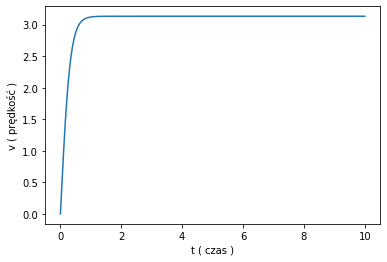

In [47]:
v0 = 0 #m/s
g = 9.81 # m/s^2
k = 1 # 1/m

t_dt = 0.0001
t_max = 10

t = [0]
v = [v0]

def dv(v, dt):
    return dt * g - dt * k * v**2 

while(t[-1] <= t_max):
    t.append(t[-1] + t_dt)
    v.append(v[-1] + dv(v[-1], t_dt))

print("Spadochroniarz będzie opadał z prędkością około ", v[-1], "m/s", sep='')
plt.plot(t, v)
plt.xlabel("t ( czas )")
plt.ylabel("v ( prędkość )")
plt.show()



#### Podzadanie 2 

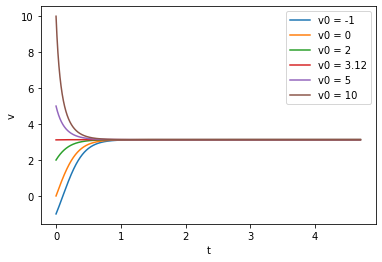

In [48]:
g = 9.81 # m/s^2
k = 1 # 1/m
t_dt = 0.0001
t_max = 4.7

def dv(v, dt):
    return dt * ( g - k * v**2 )

legend = []
#for v0 in [3.132091952674, -1, 0, 2, 3.12, 5, 10]:
for v0 in [-1, 0, 2, 3.12, 5, 10]:
    t = [0]
    v = [v0]
    while(t[-1] <= t_max):
        t.append(round(t[-1] + t_dt, 12))
        #print(v[-1], t[-1])
        v.append(v[-1] + dv(v[-1], t_dt))
        v[-1] = round(v[-1], 20)
        #print(t[-1])
    legend.append("v0 = " + str(v0))
    plt.plot(t, v)
plt.xlabel("t")
plt.ylabel("v")
plt.legend(legend)
plt.show()

Obserwacja:  
    v0 NIE ma żadnego wpływu na prędkość końcową spadochroniarza - zawsze będzie ona dążyła do punktu stabilnego v =  3.12
    Może jednak zmieniać czas potrzebny aby się znależć w tym punkcie.  

  
Wyjątkiem są wartości ujemne < 3.12 (ze względu na wzór podany w zadaniu, prędkość ujemna będzie coraz to barzdiej się zmniejszała (-v^2))

#### Podzadanie 3

##### Część 1

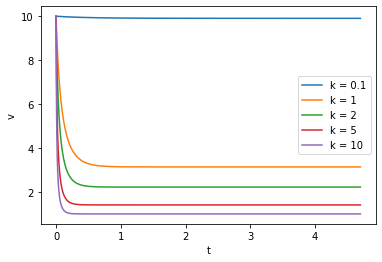

In [53]:
g = 9.81 # m/s^2
 # 1/m
v0 = 10
t_dt = 0.0001
t_max = 4.7

def dv(v, dt):
    return dt * ( g - k * v**2 )

legend = []
#for v0 in [3.132091952674, -1, 0, 2, 3.12, 5, 10]:
for k in [0.1, 1, 2, 5, 10]:
    t = [0]
    v = [v0]
    while(t[-1] <= t_max):
        t.append(round(t[-1] + t_dt, 12))
        #print(v[-1], t[-1])
        v.append(v[-1] + dv(v[-1], t_dt))
        v[-1] = round(v[-1], 20)
        #print(t[-1])
    legend.append("k = " + str(k))
    plt.plot(t, v)
plt.xlabel("t")
plt.ylabel("v")
plt.legend(legend)
plt.show()

Obserwacja:  
Wartość k zmienia poziom punktu stabilnego, lecz nie zmienia czasu potrzebnego żeby się tam znaleźć

##### Część 2

Najoptymalniejszym k jest 0.32417602539062507


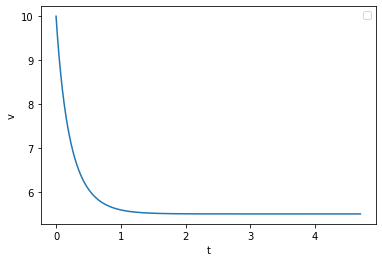

In [72]:
g = 9.81 # m/s^2
v0 = 10
t_dt = 0.0001
t_max = 4.7

def dv(v, dt):
    return dt * ( g - k * v**2 )

legend = []
#for v0 in [3.132091952674, -1, 0, 2, 3.12, 5, 10]:
# time for binsearch
v_doc = 5.5

pocz, kon = 0.1, 10
while(kon - pocz > 0.001):
    sr = (pocz + kon) / 2
    k = sr
    #print(k)
    t = [0]
    v = [v0]
    while(t[-1] <= t_max):
        t.append(round(t[-1] + t_dt, 12))
        #print(v[-1], t[-1])
        v.append(v[-1] + dv(v[-1], t_dt))
        v[-1] = round(v[-1], 20)
    if(v[-1] > v_doc):
        pocz = sr
    else:
        kon = sr

print("Najoptymalniejszym k jest", pocz)
plt.plot(t, v)

plt.xlabel("t")
plt.ylabel("v")
plt.legend(legend)
plt.show()

#### Podzadanie 4

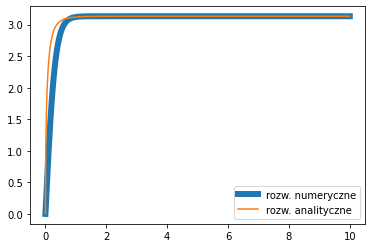

In [71]:


v0 = 0 #m/s
g = 9.81 # m/s^2
k = 1 # 1/m

t_dt = 0.001
t_max = 10

def f_anal(t):
    return sqrt(g/k) * (
        ( e**(2* sqrt(g*k*t)) - 1 )
    /   ( e**(2* sqrt(g*k*t)) + 1 )    
    )

def dv(v, dt):
    return dt * ( g - k * v**2) 

t_anal = frange(0, t_max, t_dt)
v_anal = [f_anal(t) for t in t_anal]

t = [0]
v = [v0]


while(t[-1] <= t_max):
    t.append(t[-1] + t_dt)
    v.append(v[-1] + dv(v[-1], t_dt))
plt.plot(t, v, linewidth=6)
plt.plot(t_anal, v_anal)
plt.legend(["rozw. numeryczne", "rozw. analityczne"])
plt.show()

niestety nie wiem czemu się lekko różni...

#### Podzadanie 5

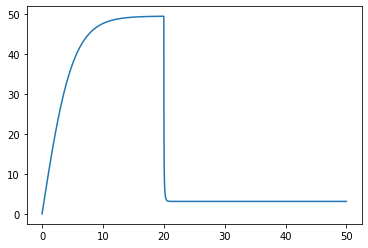

In [76]:
v0 = 0 #m/s
g = 9.81 # m/s^2
k_1 = 0.004 # 1/m
k_2 = 1

t_dt = 0.001
t_1 = 20
t_2 = 50


def dv(v, dt, k):
    return dt * ( g - k * v**2) 

t_anal = frange(0, t_max, t_dt)
v_anal = [f_anal(t) for t in t_anal]

t = [0]
v = [v0]


while(t[-1] <= t_1):
    t.append(t[-1] + t_dt)
    t[-1] = round(t[-1], 12)
    v.append(v[-1] + dv(v[-1], t_dt, k_1))

while(t[-1] <= t_2):
    t.append(t[-1] + t_dt)
    t[-1] = round(t[-1], 12)
    v.append(v[-1] + dv(v[-1], t_dt, k_2))

plt.plot(t, v)
plt.show()

#### Podzadanie 6
###### Mam zamiar wrzucić tu pewnego kobajna dla zwiększenia dokładności... (WIP)

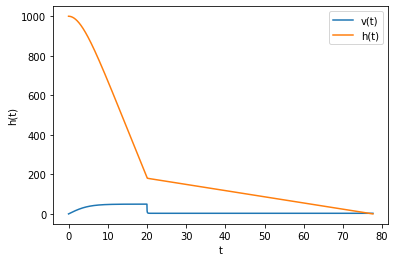

In [83]:
v0 = 0 #m/s
h0 = 1000

g = 9.81 # m/s^2
k_1 = 0.004 # 1/m
k_2 = 1

t_dt = 0.001
t_1 = 20



def dv(v, dt, k):
    return dt * ( g - k * v**2) 

t_anal = frange(0, t_max, t_dt)
v_anal = [f_anal(t) for t in t_anal]

t = [0]
v = [v0]
h = [h0]

while(t[-1] <= t_1):
    t.append(t[-1] + t_dt)
    t[-1] = round(t[-1], 12)
    v.append(v[-1] + dv(v[-1], t_dt, k_1))
    h.append(h[-1] - v[-1] * t_dt)

while(h[-1] >= 0):
    t.append(t[-1] + t_dt)
    t[-1] = round(t[-1], 12)
    v.append(v[-1] + dv(v[-1], t_dt, k_2))
    h.append(h[-1] - v[-1] * t_dt)

one_d = False

plt.plot(t, v)
plt.xlabel('t')
plt.ylabel('v(t)')
if(not one_d):
    plt.legend(['v(t)'])
    plt.show() 
plt.plot(t, h)
plt.xlabel('t')
plt.ylabel('h(t)')
if(not one_d):
    plt.legend(['h(t)'])
if(one_d):
    plt.legend(['v(t)', 'h(t)'])

plt.show()